## Chapter 8: Beyond Linear Models
### Section C: Introduction to Classification
#### MA189 Statistics and Big Data in Birmingham (with R)
##### -- _Blazer Core: City as Classroom Series_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/)


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

Classification is the process of predicting categorical outcomes. Unlike regression, which predicts continuous values, classification assigns observations to discrete categories or classes.

#### <div class="alert alert-block alert-success"> Objectives </div>
- Learn about binary and multi-class classification.
- Understand common techniques for classification beyond logistic regression.
- Explore evaluation metrics tailored for classification.

#### <div class="alert alert-block alert-success"> Types of Classification Algorithms </div>

1. **Logistic Regression**: Covered in previous sections.
2. **K-Nearest Neighbors (KNN)**: Classifies based on the closest data points.
3. **Decision Trees**: Uses a tree structure to make decisions.
4. **Random Forest**: An ensemble of decision trees to improve accuracy.
5. **Support Vector Machines (SVM)**: Finds the hyperplane that best separates classes.
6. **Naive Bayes**: Assumes feature independence and uses probability to classify.

We'll explore each of these, focusing on intuition, advantages, and limitations.

#### <div class="alert alert-block alert-success"> K-Nearest Neighbors (KNN) </div>

- **Concept**: Classifies observations based on the majority class among the nearest k neighbors.
- **Parameters**: The choice of `k` and the distance metric (e.g., Euclidean).
- **Strengths**: Simple and interpretable.
- **Limitations**: Sensitive to noisy data and the choice of `k`.


##### <div class="alert alert-block alert-info"> Details </div>

1. **Distance Metric**: For a given data point $x$, KNN finds the `k` closest points in the training set based on a distance metric (usually Euclidean distance).
   $$
   d(x, x_i) = \sqrt{\sum_{j=1}^p (x_j - x_{ij})^2}
   $$
   where $p$ is the number of features and $ x_{ij}$ represents the $j$-th feature of the $i$-th training point.

2. **Classification Rule**: KNN assigns the class of $x$ by finding the majority class among its `k` nearest neighbors.

3. **Choosing `k`**: A smaller $k$ value means the model focuses more locally (potentially overfitting), while a larger $k$ generalizes more (potentially underfitting).


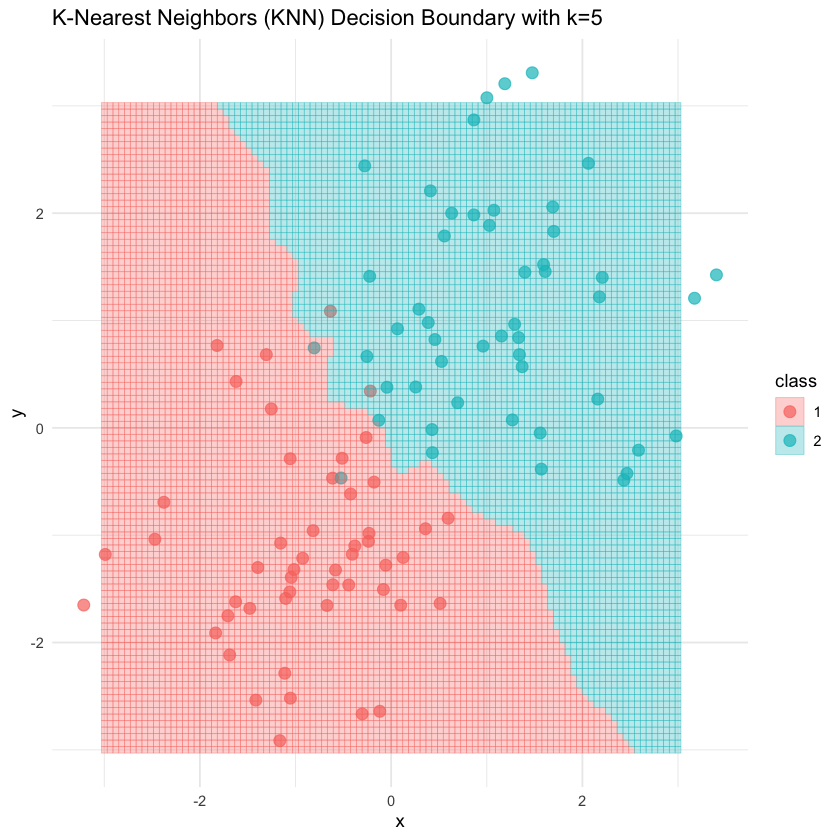

In [1]:
# Generate sample data
set.seed(1)
library(ggplot2)
library(class)

# Create a grid of points
x_min <- -3; x_max <- 3
y_min <- -3; y_max <- 3
grid <- expand.grid(x = seq(x_min, x_max, length.out = 100),
                    y = seq(y_min, y_max, length.out = 100))

# Create two classes with some overlap
n <- 50
data <- data.frame(x = c(rnorm(n, -1, 1), rnorm(n, 1, 1)),
                   y = c(rnorm(n, -1, 1), rnorm(n, 1, 1)),
                   class = factor(rep(1:2, each = n)))

# KNN prediction on grid
grid$class <- knn(data[, 1:2], grid, data$class, k = 5)

# Plot KNN decision boundary
ggplot(data, aes(x, y, color = class)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_tile(data = grid, aes(fill = class), alpha = 0.3) +
  labs(title = "K-Nearest Neighbors (KNN) Decision Boundary with k=5") +
  theme_minimal()

In [4]:
# Load necessary libraries
library(class)

# Convert the binary response variable to a factor
mtcars$high_mpg <- ifelse(mtcars$mpg > 20, "High", "Low")
mtcars$high_mpg <- as.factor(mtcars$high_mpg)  # Convert to factor

# Prepare data (e.g., using mtcars dataset for binary classification)
set.seed(123)

train_index <- sample(1:nrow(mtcars), 0.7 * nrow(mtcars))
train_data <- mtcars[train_index, ]
test_data <- mtcars[-train_index, ]

# Define predictors and target
train_x <- as.matrix(train_data[, c("wt", "hp")])
train_y <- train_data$high_mpg
test_x <- as.matrix(test_data[, c("wt", "hp")])

# Fit KNN model
k <- 5
knn_predictions <- knn(train_x, test_x, train_y, k = k)

# Evaluate accuracy
accuracy <- mean(knn_predictions == test_data$high_mpg)
cat("KNN Accuracy with k =", k, ":", accuracy, "\n")

KNN Accuracy with k = 5 : 0.9 


In [5]:
knn_predictions
test_data$high_mpg

[1] High High High High Low  Low  Low  High Low  Low 
Levels: High Low

[1] High High High Low  Low  Low  Low  High Low  Low 
Levels: High Low

In [16]:
?knn

No documentation for ‘knn.reg’ in specified packages and libraries:
you could try ‘??knn.reg’

#### <div class="alert alert-block alert-info"> Evaluation Metrics for Classification </div>

- **Accuracy**: The proportion of correctly classified instances.
     $$ \text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{Total Observations}} $$

- **Precision**: The proportion of positive predictions that are correct.
     $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

- **Recall**: The proportion of actual positives that are correctly classified.
     $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

- **F1 Score**: The harmonic mean of precision and recall, useful when classes are imbalanced.
     $$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} $$

- **ROC Curve and AUC**: The ROC curve shows the trade-off between true positive and false positive rates; AUC quantifies overall performance.
    - **ROC Curve**: Plots True Positive Rate (TPR) against False Positive Rate (FPR) at different threshold levels.
    - **AUC**: The Area Under the Curve summarizes the model’s ability to distinguish between classes, with values closer to 1 indicating better performance.


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Setting levels: control = High, case = Low

Setting direction: controls < cases



AUC: 1 


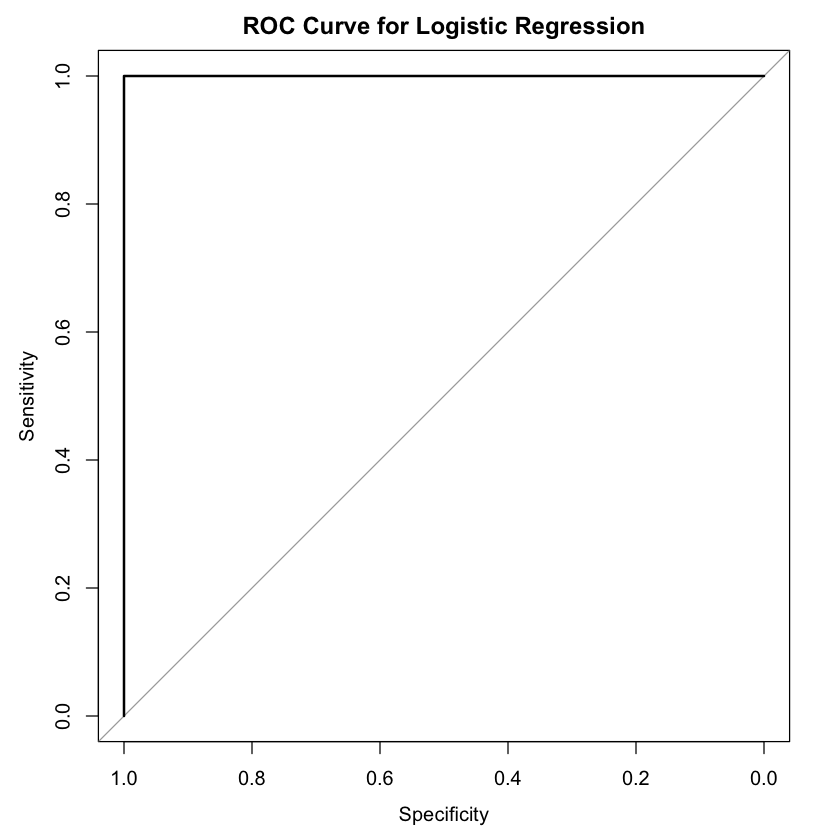

In [6]:
# Load necessary libraries
library(pROC)

# Fit logistic regression model (if not already done)
logistic_model <- glm(high_mpg ~ wt + hp, data = train_data, family = binomial)

# Predict probabilities for the test set
predicted_probs <- predict(logistic_model, newdata = test_data, type = "response")

# Calculate AUC for logistic regression
roc_curve <- roc(test_data$high_mpg, predicted_probs)
auc <- auc(roc_curve)
plot(roc_curve, main = "ROC Curve for Logistic Regression")
cat("AUC:", auc, "\n")

Setting levels: control = High, case = Low

Setting direction: controls < cases



AUC for KNN: 0.8541667 


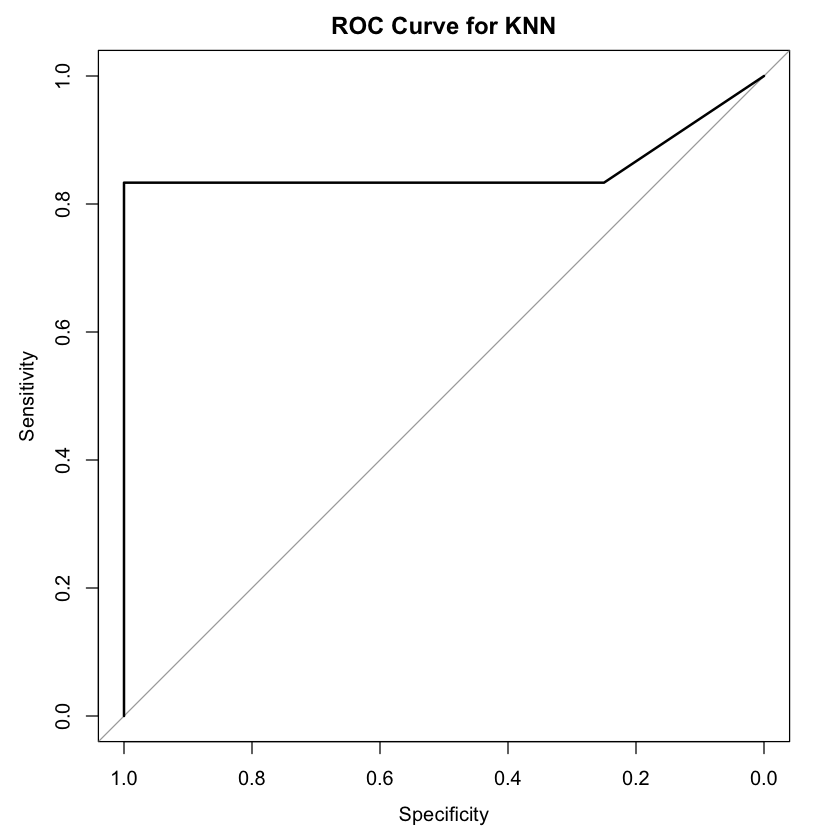

In [18]:
# Load necessary library
# if (!require("FNN")) install.packages("FNN", dependencies = TRUE)
library(FNN)

# Prepare data
train_x <- as.matrix(train_data[, c("wt", "hp")])
train_y <- as.numeric(train_data$high_mpg)  # convert to numeric for regression approximation
test_x <- as.matrix(test_data[, c("wt", "hp")])

# Run KNN with regression to approximate probabilities
k <- 5
knn_probabilities <- knn.reg(train_x, test_x, train_y, k = k)$pred
# knn_probabilities now contains probability-like values for high_mpg (approximation)

# Calculate ROC and AUC
library(pROC)
roc_curve_knn <- roc(test_data$high_mpg, knn_probabilities)
auc_knn <- auc(roc_curve_knn)
plot(roc_curve_knn, main = "ROC Curve for KNN")
cat("AUC for KNN:", auc_knn, "\n")

In [12]:
knn_probabilities

NULL

#### <div class="alert alert-block alert-success"> Decision Trees </div>

- **Concept**: Decision trees split data into subsets by creating branches based on feature values, recursively partitioning the feature space to create homogeneous regions for each class.
- **Advantages**: Intuitive and interpretable, decision trees are easy to visualize and explain.
- **Limitations**: Can overfit easily without regularization. Regularization parameters like maximum depth or minimum samples per split help control tree growth and improve generalization.

##### <div class="alert alert-block alert-info"> Details </div>

1. **Impurity Measures**: Decision trees use impurity measures like **Gini impurity** or **Entropy** to decide where to split data.
   - **Gini Impurity**: Measures the "impurity" within a node, where $p_i$ is the proportion of class $i$ in the node.
     $$ G = 1 - \sum_{i=1}^{k} p_i^2 $$
     A lower Gini impurity indicates a purer (more homogeneous) node.

   - **Entropy**: Measures the disorder within a node, where $p_i$ is the probability of class $i$ in the node.
     $$ H = -\sum_{i=1}^{k} p_i \log(p_i) $$
     Lower entropy values also indicate purer nodes.

2. **Recursive Splitting**: The tree recursively splits data based on feature values that minimize impurity, choosing the splits that best separate classes within each subset.

3. **Stopping Criteria**: Splitting stops when nodes are pure or when a stopping criterion is met (such as maximum depth, minimum samples per split, or minimum samples per leaf). These criteria prevent overfitting by controlling the depth and size of the tree.

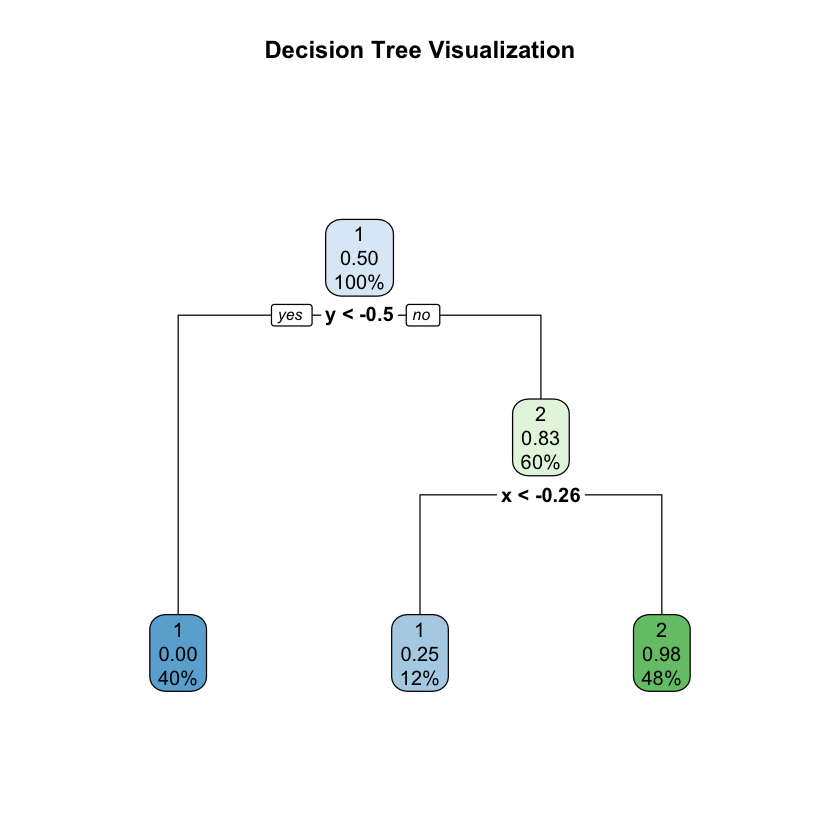

In [2]:
library(rpart)
library(rpart.plot)

# Fit a simple decision tree
dt_model <- rpart(class ~ x + y, data = data, method = "class")

# Plot decision tree
rpart.plot(dt_model, main = "Decision Tree Visualization")

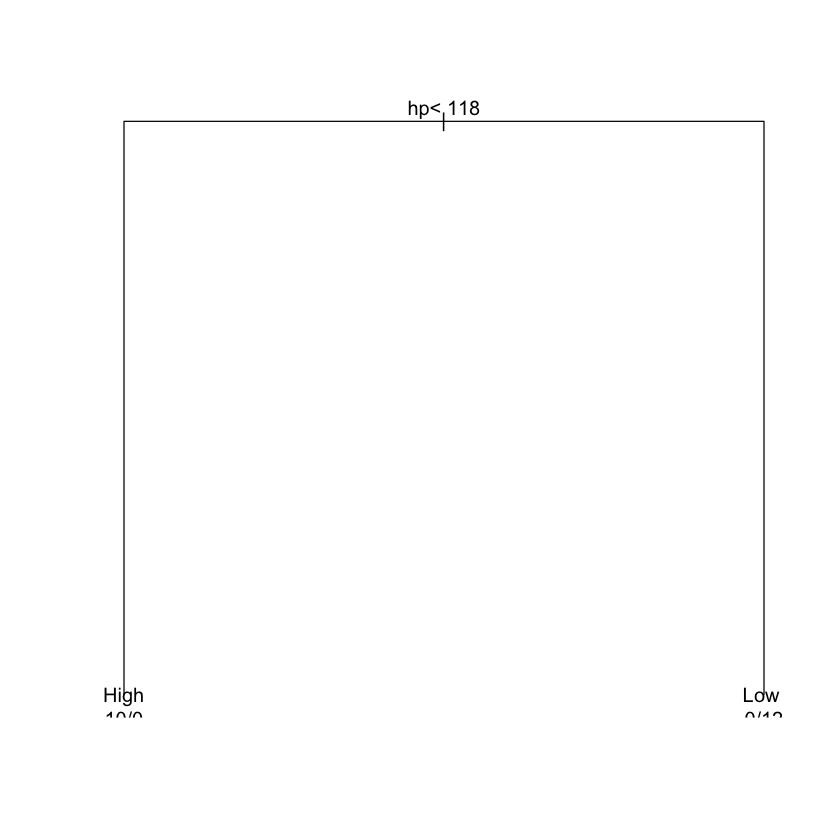

In [7]:
# Load necessary libraries
library(rpart)

# Fit Decision Tree model
decision_tree_model <- rpart(high_mpg ~ wt + hp, data = train_data, method = "class")

# Plot the decision tree
plot(decision_tree_model)
text(decision_tree_model, use.n = TRUE)

In [8]:
# Predict and calculate accuracy
dt_predictions <- predict(decision_tree_model, newdata = test_data, type = "class")
accuracy <- mean(dt_predictions == test_data$high_mpg)
cat("Decision Tree Accuracy:", accuracy, "\n")

Decision Tree Accuracy: 0.9 


Setting levels: control = High, case = Low

Setting direction: controls < cases



AUC for Decision Tree: 0.9166667 


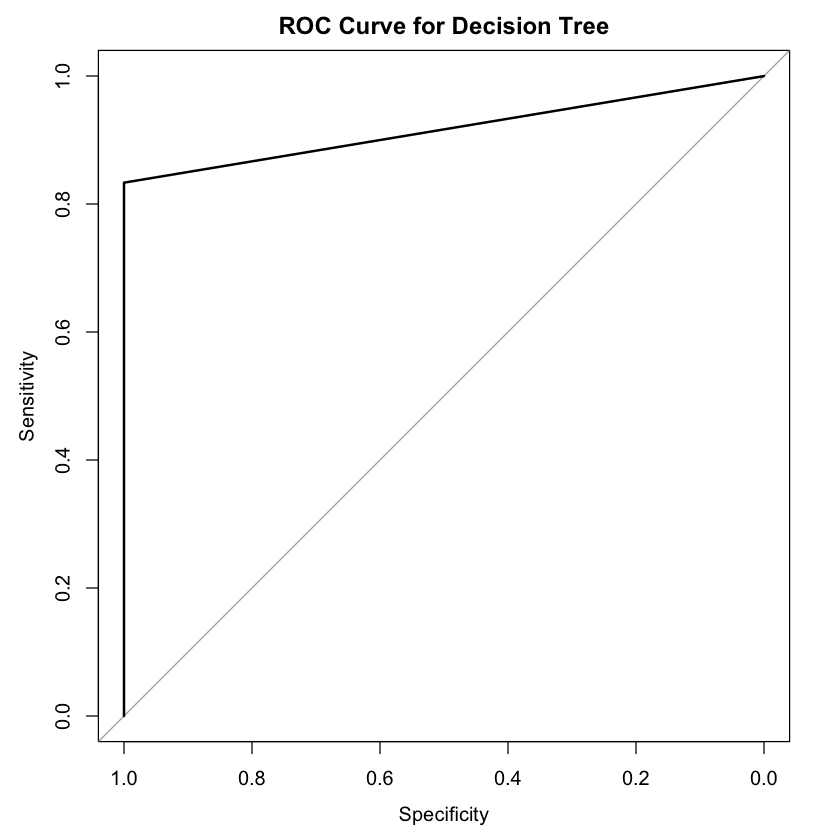

In [23]:
# For Decision Tree
dt_probabilities <- predict(decision_tree_model, newdata = test_data, type = "prob")[, 2]
roc_curve_dt <- roc(test_data$high_mpg, dt_probabilities)
auc_dt <- auc(roc_curve_dt)
plot(roc_curve_dt, main = "ROC Curve for Decision Tree")
cat("AUC for Decision Tree:", auc_dt, "\n")

#### <div class="alert alert-block alert-success"> Random Forest </div>

- **Concept**: Random Forest is an ensemble learning method that builds multiple decision trees using random subsets of data and features. By combining the outputs of multiple trees, Random Forest improves accuracy and reduces overfitting, creating a more robust model.
- **Advantages**: High accuracy, reduces overfitting by averaging multiple trees, and performs well with large datasets.
- **Limitations**: Less interpretable than a single decision tree because it aggregates multiple trees, making it difficult to visualize and understand individual decision paths.

##### <div class="alert alert-block alert-info"> Details </div>

1. **Bootstrap Aggregating (Bagging)**: 
   - Each decision tree in a Random Forest is trained on a **bootstrap sample**—a random sample with replacement from the original dataset. This sampling method ensures that each tree is trained on a slightly different subset of data, which reduces the variance of the model by preventing any single tree from dominating the ensemble.
   - **Key Benefit**: Bagging helps to make the model more stable and less sensitive to the specifics of any single training instance.

2. **Random Feature Selection**:
   - At each split within a tree, Random Forest selects a random subset of features to consider for the best split. This random feature selection helps **reduce correlation** between the individual trees, promoting diversity in the ensemble.
   - **Key Benefit**: By not relying on the same features across all trees, Random Forest improves generalization and reduces the chance of overfitting, especially when some features are very predictive.

3. **Prediction**:
   - For **classification**, each tree in the forest casts a vote for the class of a given instance. The class that receives the majority vote across all trees is chosen as the final prediction.
   - For **regression**, Random Forest averages the predictions from each tree to determine the final output.
   - **Key Benefit**: Voting or averaging across trees reduces the overall variance of predictions, leading to higher model stability and accuracy.

4. **Out-of-Bag (OOB) Error**:
   - When training each tree on a bootstrap sample, some instances are left out of the sample. These left-out instances are called **Out-of-Bag (OOB)** samples.
   - Random Forest calculates the **OOB error** by testing each tree on its OOB samples and averaging these errors. This provides a reliable estimate of model performance without needing a separate validation set.
   - **Key Benefit**: OOB error offers an unbiased evaluation of model performance, reducing the need for additional cross-validation.

##### <div class="alert alert-block alert-info"> Random Forest in Practice </div>

- **Hyperparameters FOR `randomForest`**:
  - **ntree**: The number of trees in the forest. Higher values tend to improve performance but also increase computational cost.
  - **mtry**: The number of features considered for each split. A common rule of thumb is to use $\sqrt{p}$ features for classification (where $p$ is the total number of features) and $p/3$ for regression.
  - **max_depth**: Limits the depth of each tree to prevent overfitting, especially useful for noisy data.

- **Feature Importance**:
  - Random Forest can rank the importance of features based on how frequently they’re used across all trees. This is helpful in identifying which features are most predictive for a given task.

- **Limitations**:
  - While Random Forest improves accuracy and reduces overfitting, it loses interpretability compared to a single decision tree. To address this, **feature importance** scores and **partial dependence plots** can provide some interpretability by showing the influence of individual features.
    

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




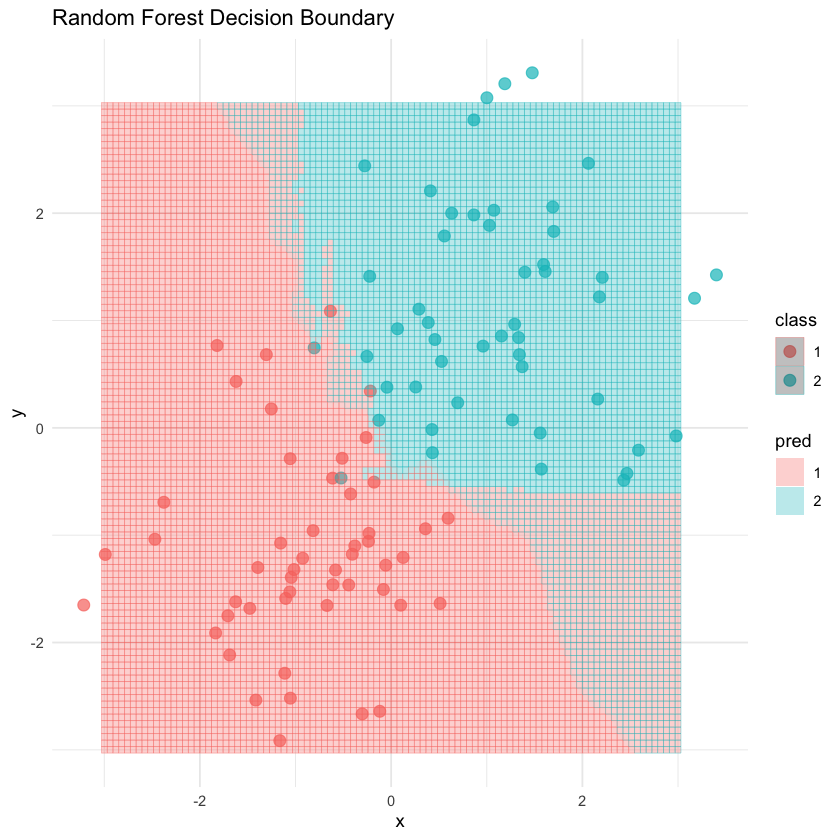

In [9]:
library(randomForest)

# Fit Random Forest model
rf_model <- randomForest(class ~ x + y, data = data, ntree = 100)

# Predict class probabilities for grid
grid$pred <- predict(rf_model, grid)

# Plot decision boundary
ggplot(data, aes(x, y, color = class)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_tile(data = grid, aes(fill = pred), alpha = 0.3) +
  labs(title = "Random Forest Decision Boundary") +
  theme_minimal()

In [7]:
# Load necessary libraries
library(randomForest)

# Fit Random Forest model
rf_model <- randomForest(high_mpg ~ wt + hp, data = train_data, ntree = 100)

# Predict and calculate accuracy
rf_predictions <- predict(rf_model, newdata = test_data)
accuracy <- mean(rf_predictions == test_data$high_mpg)
cat("Random Forest Accuracy:", accuracy, "\n")

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



Random Forest Accuracy: 1 


Setting levels: control = High, case = Low

Setting direction: controls < cases



AUC for Random Forest: 1 


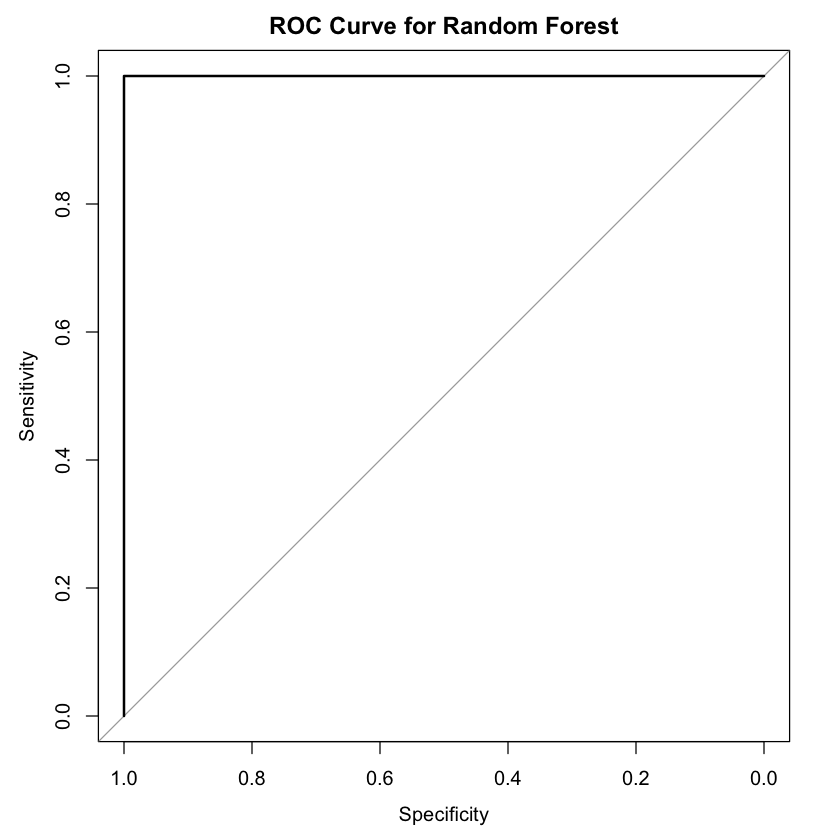

In [24]:
# For Random Forest
rf_probabilities <- predict(rf_model, newdata = test_data, type = "prob")[, 2]
roc_curve_rf <- roc(test_data$high_mpg, rf_probabilities)
auc_rf <- auc(roc_curve_rf)
plot(roc_curve_rf, main = "ROC Curve for Random Forest")
cat("AUC for Random Forest:", auc_rf, "\n")

#### <div class="alert alert-block alert-success"> Support Vector Machines (SVM) </div>

- **Concept**: Support Vector Machines (SVM) are supervised learning models used for classification and regression. SVM finds a hyperplane that best separates data into classes by maximizing the margin, which is the distance between the hyperplane and the nearest points of each class (called **support vectors**).
- **Advantages**: Effective in high-dimensional spaces and for cases where the number of features is greater than the number of samples. SVM is also memory-efficient since it only uses a subset of the training data (support vectors) in the decision function.
- **Limitations**: SVM models can be less interpretable than simpler models, and they require careful tuning of parameters (such as the kernel and regularization parameter) for optimal performance.

##### <div class="alert alert-block alert-info"> Details </div>

1. **Margin Maximization**:
   - For linearly separable data, SVM aims to find a hyperplane that maximally separates the classes by maximizing the **margin**. The margin is the distance between the hyperplane and the nearest data points from each class. 
   - The data points closest to the hyperplane are called **support vectors**. Only these points influence the position of the hyperplane, which helps to generalize the model effectively to new data.
   
   - **Intuition**: A larger margin is desirable because it gives the model a "buffer zone," making it more robust to new samples that might fall close to the boundary.

2. **Objective Function**:
   - To find the hyperplane, SVM minimizes the norm of the weight vector $w$ (to maximize the margin), while correctly classifying the training data points.
   - **Optimization Problem**:
     - The optimization goal is to minimize:
       $$ \min \frac{1}{2} \|w\|^2 $$
       - Subject to the constraint for all data points $i$:
       $$ y_i (w \cdot x_i + b) \geq 1 $$
       where $y_i$ is the class label (+1 or -1), $w$ is the weight vector, $x_i$ is the feature vector for the $i$-th data point, and $b$ is the bias term.

   - **Soft Margin SVM**: For non-separable data, SVM allows some points to violate the margin constraints, introducing a penalty controlled by a regularization parameter $C$ to balance the margin size and classification errors.
       - The objective function for soft margin SVM becomes:
         $$ \min \frac{1}{2} \|w\|^2 + C \sum \xi_i $$
         where $\xi_i$ are the slack variables allowing violations, and $C$ controls the trade-off between maximizing the margin and minimizing classification errors.

3. **Kernel Trick**:
   - For cases where data is not linearly separable in its original space, SVM uses the **kernel trick** to map the data into a higher-dimensional space where it can be separated by a hyperplane.
   - **Common Kernels**:
     - **Linear Kernel**: $K(x, x') = x \cdot x'$
     - **Polynomial Kernel**: $K(x, x') = (x \cdot x' + 1)^d$
     - **Radial Basis Function (RBF) or Gaussian Kernel**: $K(x, x') = \exp(-\gamma \|x - x'\|^2)$
   - **Benefit**: The kernel trick allows SVM to operate in high-dimensional spaces without explicitly computing the coordinates in that space, making it computationally efficient.

4. **Support Vectors**:
   - The **support vectors** are the data points that lie closest to the decision boundary. These points are critical in defining the position of the hyperplane and are the only points that influence the model. Removing non-support vectors would not change the position of the hyperplane.


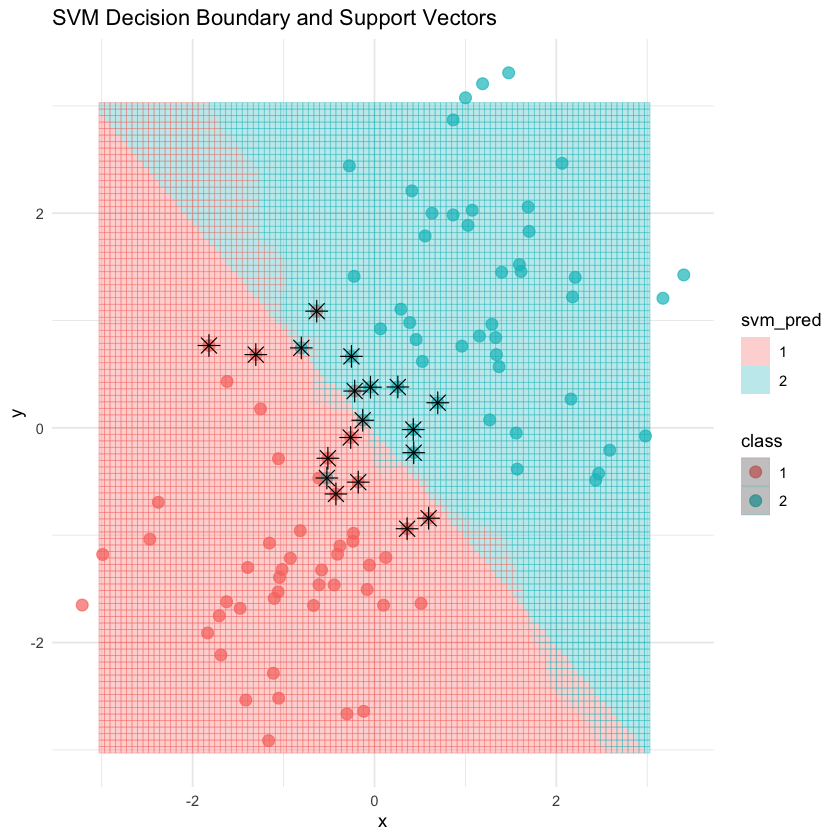

In [10]:
library(e1071)

# Fit SVM model
svm_model <- svm(class ~ x + y, data = data, kernel = "linear")

# Get SVM decision boundary
grid$svm_pred <- predict(svm_model, grid)

# Plot SVM decision boundary with support vectors
ggplot(data, aes(x, y, color = class)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_tile(data = grid, aes(fill = svm_pred), alpha = 0.3) +
  geom_point(data = data[svm_model$index, ], shape = 8, size = 4, color = "black") +
  labs(title = "SVM Decision Boundary and Support Vectors") +
  theme_minimal()

##### <div class="alert alert-block alert-info"> Regularization and Parameters </div>

- **Regularization Parameter (C)**: Controls the trade-off between achieving a larger margin and minimizing classification errors.
   - A smaller $C$ value allows a larger margin, potentially with some misclassifications.
   - A larger $C$ value tries to classify all points correctly but may lead to overfitting.
   
- **Kernel and Parameters**: Choosing the right kernel and tuning its parameters (e.g., $\gamma$ for the RBF kernel) is crucial for non-linear SVMs to perform well.



In [8]:
# Load necessary libraries
library(e1071)

# Fit SVM model
svm_model <- svm(high_mpg ~ wt + hp, data = train_data, kernel = "linear")

# Predict and calculate accuracy
svm_predictions <- predict(svm_model, newdata = test_data)
accuracy <- mean(svm_predictions == test_data$high_mpg)
cat("SVM Accuracy:", accuracy, "\n")

SVM Accuracy: 0.9 


Setting levels: control = High, case = Low

Setting direction: controls > cases



AUC for SVM: 1 


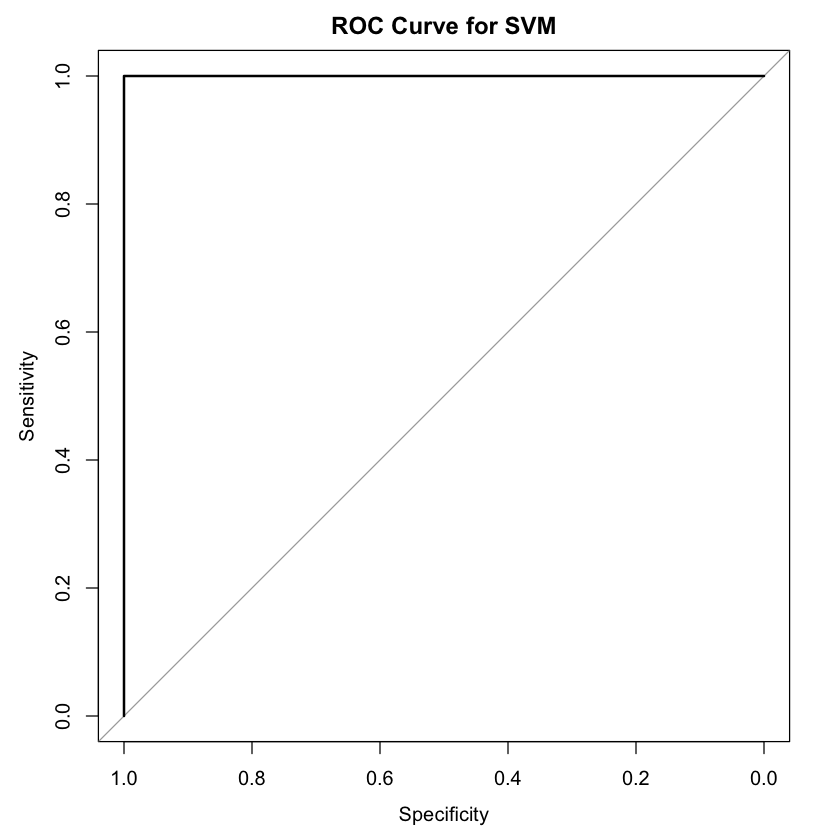

In [25]:
svm_model <- svm(high_mpg ~ wt + hp, data = train_data, kernel = "linear", probability = TRUE)
svm_probabilities <- attr(predict(svm_model, newdata = test_data, probability = TRUE), "probabilities")[, 2]
roc_curve_svm <- roc(test_data$high_mpg, svm_probabilities)
auc_svm <- auc(roc_curve_svm)
plot(roc_curve_svm, main = "ROC Curve for SVM")
cat("AUC for SVM:", auc_svm, "\n")

#### <div class="alert alert-block alert-info"> Choosing the Right Model </div>

- Consider interpretability, accuracy, computation time, and the complexity of the model.
- **Logistic Regression and Naive Bayes**: Best for small, interpretable models.
- **KNN and SVM**: Effective with non-linear relationships, but require careful tuning.
- **Random Forest**: Powerful and robust to overfitting; generally provides high accuracy.
- **Decision Trees**: Intuitive and interpretable but prone to overfitting.

Choosing the right model depends on your data, the problem requirements, and available resources.

##### <div class="alert alert-block alert-info"> Confusion Matrix </div>


The confusion matrix shows the counts of true positives, false positives, true negatives, and false negatives, providing a detailed view of the classification results.

In [26]:
# Confusion Matrix Example
library(caret)
confusionMatrix(factor(knn_predictions), factor(test_data$high_mpg))

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction High Low
      High    4   1
      Low     0   5
                                         
               Accuracy : 0.9            
                 95% CI : (0.555, 0.9975)
    No Information Rate : 0.6            
    P-Value [Acc > NIR] : 0.04636        
                                         
                  Kappa : 0.8            
                                         
 Mcnemar's Test P-Value : 1.00000        
                                         
            Sensitivity : 1.0000         
            Specificity : 0.8333         
         Pos Pred Value : 0.8000         
         Neg Pred Value : 1.0000         
             Prevalence : 0.4000         
         Detection Rate : 0.4000         
   Detection Prevalence : 0.5000         
      Balanced Accuracy : 0.9167         
                                         
       'Positive' Class : High           
                                         

##### <div class="alert alert-block alert-info"> Precision-Recall Curve and F1 Score </div>
For imbalanced classes, a `Precision-Recall Curve` can often be more informative than an ROC Curve, especially if we’re interested in how well the model identifies the positive class.

In [27]:
# Calculate Precision, Recall, and F1 Score
precision <- posPredValue(factor(knn_predictions), factor(test_data$high_mpg))
recall <- sensitivity(factor(knn_predictions), factor(test_data$high_mpg))
f1_score <- 2 * (precision * recall) / (precision + recall)
cat("Precision:", precision, "\nRecall:", recall, "\nF1 Score:", f1_score, "\n")

Precision: 0.8 
Recall: 1 
F1 Score: 0.8888889 


##### <div class="alert alert-block alert-info"> Log-Loss </div>
`Log-Loss` measures the performance of a classification model where the prediction is a probability between 0 and 1. Lower log-loss values indicate better performance.

In [29]:
# Log-Loss Example for KNN
log_loss <- -mean(test_data$high_mpg * log(knn_probabilities) + (1 - test_data$high_mpg) * log(1 - knn_probabilities))
cat("Log-Loss:", log_loss, "\n")

Warning message in Ops.factor(test_data$high_mpg, log(knn_probabilities)):
“‘*’ not meaningful for factors”
Warning message in Ops.factor(1, test_data$high_mpg):
“‘-’ not meaningful for factors”
Warning message in log(1 - knn_probabilities):
“NaNs produced”


Log-Loss: NA 


In [30]:
# Convert `high_mpg` to numeric (1 for high, 0 for low)
test_data$high_mpg_numeric <- as.numeric(test_data$high_mpg) - 1  # Assuming "high" is class 1

# Make sure probabilities are within bounds [0 + epsilon, 1 - epsilon] to avoid log(0) issues
epsilon <- 1e-15  # small constant to prevent log(0)
knn_probabilities <- pmin(pmax(knn_probabilities, epsilon), 1 - epsilon)

# Calculate Log-Loss
log_loss <- -mean(test_data$high_mpg_numeric * log(knn_probabilities) + 
                  (1 - test_data$high_mpg_numeric) * log(1 - knn_probabilities))
cat("Log-Loss:", log_loss, "\n")

Log-Loss: 13.81583 


##### <div class="alert alert-block alert-info"> Summary of Evaluation Metrics </div>

- **ROC Curve and AUC**: Measure the ability of the model to distinguish between classes at various thresholds. High AUC is preferred.
- **Precision-Recall Curve**: Useful for imbalanced datasets to understand how well the model captures the positive class.
- **Confusion Matrix**: Provides a detailed breakdown of prediction results for each class.
- **Log-Loss**: A continuous loss function for probabilistic predictions; lower values indicate better probabilistic accuracy.
- **F1 Score**: Balances precision and recall, useful when both are important to optimize.